# Environment Variable

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf # https://github.com/ranaroussi/yfinance
from multipledispatch import dispatch
from datetime import datetime, timedelta
import gym
import os

In [2]:
STOCK_NAME = "USDBRL=X"
ASSETS_URL = "assets/"
FILE_NAME = "usd2brl.csv"
FILE_URL = ASSETS_URL + FILE_NAME
LOG_PATH = "logs/"
PERIOD = "7d" # 7 days
INTERVAL = "1m" # 1 minute

# Carregando dados CSV

In [31]:
import pandas as pd

In [4]:
dataset = pd.read_csv('../' + ASSETS_URL + FILE_NAME)
dataset = dataset.iloc[:, 1:] 
dataset

,Datetime,Open,High,Low,Close
0,2022-02-03 00:00:00+00:00,5.2834,5.2834,5.2834,5.2834
1,2022-02-03 00:05:00+00:00,5.2834,5.2834,5.2834,5.2834
2,2022-02-03 00:16:00+00:00,5.2834,5.2834,5.2834,5.2834
3,2022-02-03 00:17:00+00:00,5.2834,5.2834,5.2834,5.2834
4,2022-02-03 00:18:00+00:00,5.2834,5.2834,5.2834,5.2834
...,...,...,...,...,...
4921,2022-02-11 21:55:00+00:00,5.2313,5.2313,5.2313,5.2313
4922,2022-02-11 21:57:00+00:00,5.2313,5.2313,5.2313,5.2313
4923,2022-02-11 21:59:00+00:00,5.2313,5.2313,5.2313,5.2313
4924,2022-02-11 22:00:00+00:00,5.2313,5.2313,5.2313,5.2313


In [76]:
# Gym stuff
import gym
import gym_anytrading 

# stable baselines
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# https://www.youtube.com/watch?v=D9sU1hLT0QY&ab_channel=NicholasRenotte

## Bring in Marketwatch GME Data

In [106]:
df = pd.read_csv('../assets/b3-2022-02-13.csv') # marketwatch

In [107]:
df.head()

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-02-03 10:08:00-03:00,14.11,14.25,14.11,14.23,0,0,0
1,2022-02-03 10:09:00-03:00,14.23,14.28,14.23,14.26,80900,0,0
2,2022-02-03 10:10:00-03:00,14.27,14.30,14.22,14.26,78500,0,0
3,2022-02-03 10:11:00-03:00,14.26,14.31,14.22,14.23,123500,0,0
4,2022-02-03 10:12:00-03:00,14.23,14.25,14.23,14.25,12600,0,0


In [108]:
df.dtypes

Datetime         object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

In [109]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.dtypes

Datetime        datetime64[ns, pytz.FixedOffset(-180)]
Open                                           float64
High                                           float64
Low                                            float64
Close                                          float64
Volume                                           int64
Dividends                                        int64
Stock Splits                                     int64
dtype: object

In [110]:
df.set_index('Datetime', inplace=True)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2022-02-03 10:08:00-03:00,14.11,14.25,14.11,14.23,0,0,0
2022-02-03 10:09:00-03:00,14.23,14.28,14.23,14.26,80900,0,0
2022-02-03 10:10:00-03:00,14.27,14.30,14.22,14.26,78500,0,0
2022-02-03 10:11:00-03:00,14.26,14.31,14.22,14.23,123500,0,0
2022-02-03 10:12:00-03:00,14.23,14.25,14.23,14.25,12600,0,0


In [111]:
df.sort_values('Datetime', ascending=True, inplace=True)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2022-02-03 10:08:00-03:00,14.11,14.25,14.11,14.23,0,0,0
2022-02-03 10:09:00-03:00,14.23,14.28,14.23,14.26,80900,0,0
2022-02-03 10:10:00-03:00,14.27,14.30,14.22,14.26,78500,0,0
2022-02-03 10:11:00-03:00,14.26,14.31,14.22,14.23,123500,0,0
2022-02-03 10:12:00-03:00,14.23,14.25,14.23,14.25,12600,0,0


In [112]:
env = gym.make('stocks-v0', df=df, frame_bound=(10, 500), window_size=10)

In [113]:
env.prices

array([14.22999954, 14.26000023, 14.26000023, 14.22999954, 14.25      ,
       14.18999958, 14.23999977, 14.22000027, 14.22000027, 14.21000004,
       14.22000027, 14.26000023, 14.23999977, 14.26000023, 14.25      ,
       14.23999977, 14.26000023, 14.35000038, 14.34000015, 14.32999992,
       14.32999992, 14.31000042, 14.28999996, 14.27000046, 14.26000023,
       14.23999977, 14.19999981, 14.19999981, 14.18999958, 14.15999985,
       14.18999958, 14.19999981, 14.22000027, 14.22000027, 14.18000031,
       14.18999958, 14.22000027, 14.22000027, 14.19999981, 14.18999958,
       14.18999958, 14.18999958, 14.19999981, 14.21000004, 14.21000004,
       14.18999958, 14.18999958, 14.22000027, 14.21000004, 14.22000027,
       14.22000027, 14.22999954, 14.26000023, 14.25      , 14.26000023,
       14.25      , 14.25      , 14.25      , 14.25      , 14.27000046,
       14.26000023, 14.26000023, 14.27000046, 14.25      , 14.26000023,
       14.25      , 14.22999954, 14.23999977, 14.22000027, 14.22

In [114]:
env.signal_features

array([[ 1.42299995e+01,  0.00000000e+00],
       [ 1.42600002e+01,  3.00006866e-02],
       [ 1.42600002e+01,  0.00000000e+00],
       [ 1.42299995e+01, -3.00006866e-02],
       [ 1.42500000e+01,  2.00004578e-02],
       [ 1.41899996e+01, -6.00004196e-02],
       [ 1.42399998e+01,  5.00001907e-02],
       [ 1.42200003e+01, -1.99995041e-02],
       [ 1.42200003e+01,  0.00000000e+00],
       [ 1.42100000e+01, -1.00002289e-02],
       [ 1.42200003e+01,  1.00002289e-02],
       [ 1.42600002e+01,  3.99999619e-02],
       [ 1.42399998e+01, -2.00004578e-02],
       [ 1.42600002e+01,  2.00004578e-02],
       [ 1.42500000e+01, -1.00002289e-02],
       [ 1.42399998e+01, -1.00002289e-02],
       [ 1.42600002e+01,  2.00004578e-02],
       [ 1.43500004e+01,  9.00001526e-02],
       [ 1.43400002e+01, -1.00002289e-02],
       [ 1.43299999e+01, -1.00002289e-02],
       [ 1.43299999e+01,  0.00000000e+00],
       [ 1.43100004e+01, -1.99995041e-02],
       [ 1.42900000e+01, -2.00004578e-02],
       [ 1.

## Build Environment

In [115]:
env.action_space

Discrete(2)

info {'total_reward': -0.09999847412111684, 'total_profit': 0.1444131341090064, 'position': 1}


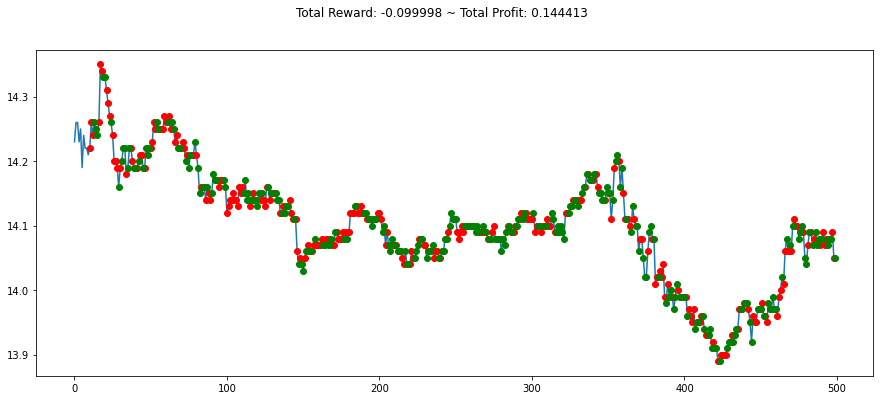

In [117]:
state = env.reset()
while True:
    action= env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print('info', info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

## 2.1 - Add Custom Indicators

### 2.1.1 - Install and Import New Dependencies

In [118]:
# !pip install finta

In [119]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [120]:
df['Volume'] = df.Volume.apply(lambda x: float(x))
df.dtypes
df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
df

,Open,High,Low,Close,Volume
Datetime,,,,,
2022-02-03 10:08:00-03:00,14.11,14.25,14.11,14.23,0.0
2022-02-03 10:09:00-03:00,14.23,14.28,14.23,14.26,80900.0
2022-02-03 10:10:00-03:00,14.27,14.30,14.22,14.26,78500.0
2022-02-03 10:11:00-03:00,14.26,14.31,14.22,14.23,123500.0
2022-02-03 10:12:00-03:00,14.23,14.25,14.23,14.25,12600.0
...,...,...,...,...,...
2022-02-11 15:55:00-03:00,14.16,14.16,14.14,14.15,153400.0
2022-02-11 15:56:00-03:00,14.14,14.16,14.14,14.15,71000.0
2022-02-11 15:57:00-03:00,14.16,14.16,14.13,14.13,159800.0


In [ ]:
# 2.1.2. Calculate SMA, RSI and OBV

In [124]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [127]:
df.tail()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Datetime,,,,,,,,
2022-02-11 15:55:00-03:00,14.16,14.16,14.14,14.15,153400.0,14.120000,54.798104,1860600.0
2022-02-11 15:56:00-03:00,14.14,14.16,14.14,14.15,71000.0,14.120000,54.798104,0.0
2022-02-11 15:57:00-03:00,14.16,14.16,14.13,14.13,159800.0,14.121667,48.215289,1700800.0
2022-02-11 15:58:00-03:00,14.12,14.13,14.09,14.09,311200.0,14.122500,38.304269,1389600.0
2022-02-11 15:59:00-03:00,14.10,14.10,14.07,14.07,102200.0,14.119167,34.486989,1287400.0


In [129]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low','Volume','SMA','RSI','OBV']].to_numpy()[start:end]
    return prices, signal_features

In [130]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals

env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,240))

In [131]:
env2.prices

array([14.10999966, 14.22999954, 14.22000027, 14.22000027, 14.22999954,
       14.18000031, 14.19999981, 14.22000027, 14.19999981, 14.21000004,
       14.21000004, 14.22999954, 14.22999954, 14.25      , 14.25      ,
       14.23999977, 14.25      , 14.26000023, 14.32999992, 14.32999992,
       14.31999969, 14.30000019, 14.27999973, 14.27000046, 14.25      ,
       14.22000027, 14.19999981, 14.18999958, 14.14999962, 14.15999985,
       14.15999985, 14.18000031, 14.18999958, 14.21000004, 14.18000031,
       14.17000008, 14.18000031, 14.19999981, 14.18999958, 14.17000008,
       14.18999958, 14.18000031, 14.18000031, 14.18999958, 14.19999981,
       14.18000031, 14.18000031, 14.18999958, 14.18999958, 14.19999981,
       14.21000004, 14.22000027, 14.22999954, 14.25      , 14.22999954,
       14.25      , 14.25      , 14.25      , 14.23999977, 14.23999977,
       14.25      , 14.25      , 14.23999977, 14.25      , 14.25      ,
       14.23999977, 14.21000004, 14.22999954, 14.21000004, 14.18

In [132]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Datetime,,,,,,,,
2022-02-03 10:08:00-03:00,14.11,14.25,14.11,14.23,0.0,0.0,0.000000,0.0
2022-02-03 10:09:00-03:00,14.23,14.28,14.23,14.26,80900.0,0.0,100.000000,80900.0
2022-02-03 10:10:00-03:00,14.27,14.30,14.22,14.26,78500.0,0.0,100.000000,0.0
2022-02-03 10:11:00-03:00,14.26,14.31,14.22,14.23,123500.0,0.0,46.301370,-42600.0
2022-02-03 10:12:00-03:00,14.23,14.25,14.23,14.25,12600.0,0.0,61.243219,-30000.0


In [133]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [134]:
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=100000)

Using cuda device
------------------------------------
| time/                 |          |
|    fps                | 792      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.683   |
|    explained_variance | -46.5    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.136   |
|    value_loss         | 0.0521   |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 807       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -0.675    |
|    explained_variance | -1.03e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 199       |
|    policy_loss        | -0.107    |
|    val

RuntimeError: Unknown device: 123. If you have recently updated the caffe2.proto file to add a new device type, did you forget to update the DeviceTypeName() function to reflect such recent changes?

In [139]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(500,600))
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...] # reshape
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print('info', info)
        break

info {'total_reward': -0.06999969482421875, 'total_profit': 0.8954497447416366, 'position': 0}


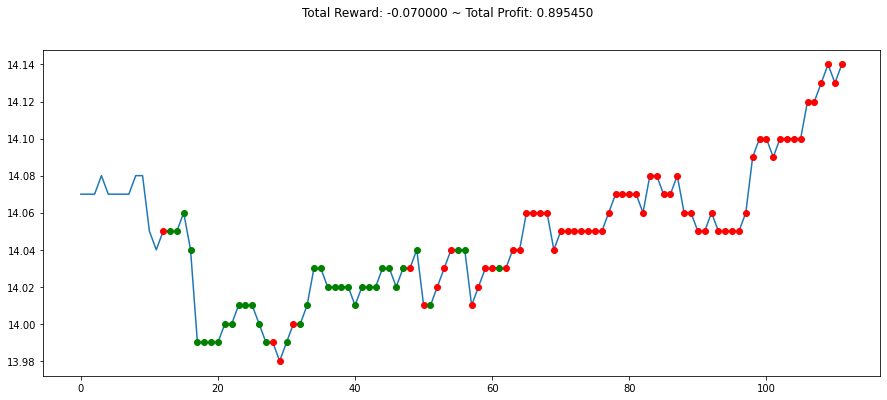

In [140]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

## Build Environment and Train

In [21]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5, 100), window_size=5)
env = DummyVecEnv([env_maker])

In [28]:
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=100000)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | -0.644   |
| time/                 |          |
|    fps                | 817      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.675   |
|    explained_variance | -0.0719  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.166    |
|    value_loss         | 0.355    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | -1.1     |
| time/                 |          |
|    fps                | 830      |
|    iterations         | 200      |
|    time_elapsed

# Evaluation

In [29]:
env = gym.make('stocks-v0', df=df, frame_bound=(90, 110), window_size=5)
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...] # reshape
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print('info', info)
        break

info {'total_reward': 2.42, 'total_profit': 0.7690699082878487, 'position': 1}


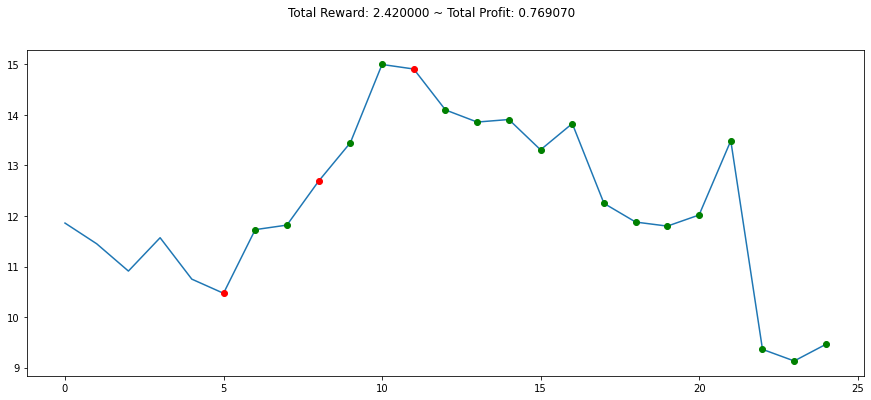

In [30]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()